In [30]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
housing = fetch_california_housing()
california = pd.DataFrame(housing.data,columns=housing.feature_names)
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

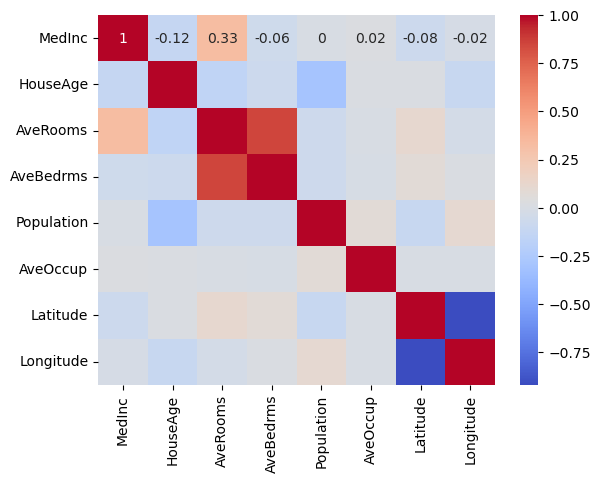

In [32]:
correlation_matrix = california.corr().round(2)

sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True)

In [33]:
target = california['AveBedrms']
features = ["AveRooms"]

In [34]:
X = pd.DataFrame(california["AveRooms"],columns=features)
Y = target

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=5)

In [36]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [37]:
# comparando com os valores do treino

rmse = np.sqrt(mean_squared_error(Y_train,lin_model.predict(X_train)))
r2 = r2_score(Y_train,lin_model.predict(X_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.2499030080321727
R2 score is 0.7259814010784837




In [38]:
# agora com os dados de teste

rmse = np.sqrt(mean_squared_error(Y_test,lin_model.predict(X_test)))
r2 = r2_score(Y_test,lin_model.predict(X_test))

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 0.2575798866514268
R2 score is 0.6859385067828059




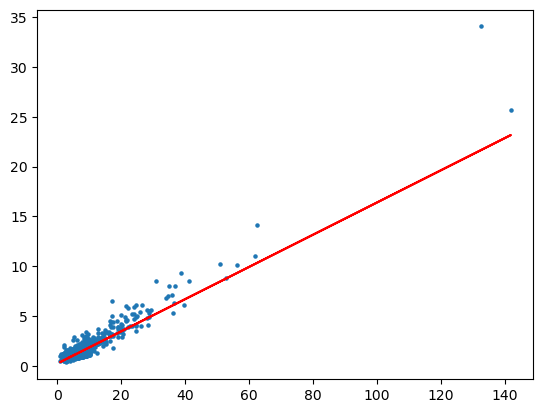

In [44]:
plt.scatter(X_train,Y_train,s=5)
plt.plot(X_train,lin_model.predict(X_train),color='red')